In [1]:
# Sample API
import flowx
import numpy
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 40, 40
xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0

Re   = 100.0
dt   = 0.01
tmax = 10.

# Define cell-centered variable names
center_vars = ['pres', 'divv', 'asol', 'eror']
face_vars   = ['velc', 'hvar', 'asol', 'eror']

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_pres = {'pres': ['neumann', 'neumann', 'neumann', 'neumann']}
bc_val_pres  = {'pres': [0.0, 0.0, 0.0, 0.0]}

bc_type_u = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_u  = {'velc': [0.0, 0.0, 0.0, 1.0]}

bc_type_v = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_v  = {'velc': [0.0, 0.0, 0.0, 0.0]}

# Create the grid and data
gridc = flowx.Grid('cell-centered', center_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_pres, user_bc_val=bc_val_pres)

gridx = flowx.Grid('x-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_u, user_bc_val=bc_val_u)

gridy = flowx.Grid('y-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_v, user_bc_val=bc_val_v)

scalars = flowx.Scalars(tmax=10.0, dt=0.01, Re=100.0)

In [3]:
ins_vars = ['velc', 'hvar', 'divv', 'pres']

while scalars.variable['time'] <= scalars.variable['tmax']:
    
    # Update the time-dependent boundary condition value
#    simulation.update_bc_val(gridx, gridy, 'velc', scalars.variable['time'])
### Step 1 ###    
    # Predictor Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'predictor_step1')
    
    # Divergence Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'divergence_step1')
    
    # Solve the pressure Poisson equation 
    scalars.stats['ites'], scalars.stats['res'] = flowx.poisson.solve_jacobi(gridc, 'pres', 'divv',
                                                                       maxiter=10000, tol=1e-9)
    # Corrector Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'corrector_step1')
    
    
### Step 2 ###    
    # Predictor Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'predictor_step2')
    
    # Divergence Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'divergence_step2')
    
    # Solve the pressure Poisson equation 
    scalars.stats['ites'], scalars.stats['res'] = flowx.poisson.solve_jacobi(gridc, 'pres', 'divv',
                                                                       maxiter=10000, tol=1e-9)
    # Corrector Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'corrector_step2')
    
### Step 3 ###    
    
    # Predictor Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'predictor_step3')
    
    # Divergence Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'divergence_step3')
    
    # Solve the pressure Poisson equation 
    scalars.stats['ites'], scalars.stats['res'] = flowx.poisson.solve_jacobi(gridc, 'pres', 'divv',
                                                                       maxiter=10000, tol=1e-9)
    # Corrector Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'corrector_step3')
    
    
    # Display stats
    if scalars.variable['nstep'] % 10 == 0:
        flowx.io.display_stats(scalars)   

    scalars.advance()

------------ Time = 0.0 ---------------
Number of poisson iterations    : 6752
Final poisson residual : 9.99814109019685e-10
Max, Min, U   : 2.0, -0.04191098712844707
Max, Min, V   : 0.12099443014837154, -0.12099443014837154
Max, Min, P   : 1.6873994062681374, -1.6633107575001214
Max, Min, DIV : 1260.304597606076, -1300.1103324598303


------------ Time = 0.09999999999999999 ---------------
Number of poisson iterations    : 4063
Final poisson residual : 9.990598508436051e-10
Max, Min, U   : 2.0, -0.12980490303399772
Max, Min, V   : 0.3036256582738623, -0.30607195491435807
Max, Min, P   : 1.1812845715318474, -0.8744365608118769
Max, Min, DIV : 1129.2864520808869, -1498.4019726596841


------------ Time = 0.20000000000000004 ---------------
Number of poisson iterations    : 2820
Final poisson residual : 9.997890127598565e-10
Max, Min, U   : 2.0, -0.15023453229163222
Max, Min, V   : 0.31836921884648334, -0.36741174333040155
Max, Min, P   : 1.1791319669577973, -0.7900347956103858
Max, Min,

------------ Time = 2.399999999999993 ---------------
Number of poisson iterations    : 353
Final poisson residual : 9.993319436006374e-10
Max, Min, U   : 2.0, -0.2320882362727366
Max, Min, V   : 0.34593270846427504, -0.5064447414622846
Max, Min, P   : 1.2931570568337072, -0.6897481415087369
Max, Min, DIV : 1131.2501311283945, -1532.630132259053


------------ Time = 2.4999999999999907 ---------------
Number of poisson iterations    : 359
Final poisson residual : 9.995604621933902e-10
Max, Min, U   : 2.0, -0.23279127437471525
Max, Min, V   : 0.34597318562061774, -0.5074713482489681
Max, Min, P   : 1.2944006281482645, -0.6894763302034039
Max, Min, DIV : 1131.2582433843133, -1532.6401615628831


------------ Time = 2.5999999999999885 ---------------
Number of poisson iterations    : 365
Final poisson residual : 9.98566534250539e-10
Max, Min, U   : 2.0, -0.2332795161926955
Max, Min, V   : 0.34600945707928515, -0.5083921489855974
Max, Min, P   : 1.2955542276255292, -0.6892301121216168
Max,

------------ Time = 4.799999999999942 ---------------
Number of poisson iterations    : 439
Final poisson residual : 9.99738990441963e-10
Max, Min, U   : 2.0, -0.2377779772625347
Max, Min, V   : 0.34634109360532067, -0.5168215147330357
Max, Min, P   : 1.308566783960608, -0.686684495141641
Max, Min, DIV : 1131.4247877346866, -1532.7388539903425


------------ Time = 4.89999999999994 ---------------
Number of poisson iterations    : 439
Final poisson residual : 9.997837232923632e-10
Max, Min, U   : 2.0, -0.23782993795350582
Max, Min, V   : 0.346346823856867, -0.5169682173161706
Max, Min, P   : 1.308846718647482, -0.6866309582969841
Max, Min, DIV : 1131.4301473687144, -1532.7404962149096


------------ Time = 4.999999999999938 ---------------
Number of poisson iterations    : 438
Final poisson residual : 9.992584785209266e-10
Max, Min, U   : 2.0, -0.23787239965356968
Max, Min, V   : 0.3463521971064972, -0.5171059095141488
Max, Min, P   : 1.309111534825652, -0.6865802554449123
Max, Min, DI

------------ Time = 7.199999999999891 ---------------
Number of poisson iterations    : 274
Final poisson residual : 9.983517963061145e-10
Max, Min, U   : 2.0, -0.23926807366640196
Max, Min, V   : 0.3464153810680495, -0.5187380946419308
Max, Min, P   : 1.3124060617867068, -0.6859434683928615
Max, Min, DIV : 1131.5060709967654, -1532.7601794770849


------------ Time = 7.299999999999889 ---------------
Number of poisson iterations    : 264
Final poisson residual : 9.989000110845146e-10
Max, Min, U   : 2.0, -0.23930114525159937
Max, Min, V   : 0.3464167561884972, -0.5187739681251888
Max, Min, P   : 1.3124816894070392, -0.6859286633140175
Max, Min, DIV : 1131.507824502001, -1532.7605731423062


------------ Time = 7.399999999999887 ---------------
Number of poisson iterations    : 253
Final poisson residual : 9.999718985927784e-10
Max, Min, U   : 2.0, -0.2393320903247396
Max, Min, V   : 0.3464180559842729, -0.518807894079533
Max, Min, P   : 1.3125533345883782, -0.6859146235913215
Max, Min

------------ Time = 9.59999999999984 ---------------
Number of poisson iterations    : 206
Final poisson residual : 9.99538324830488e-10
Max, Min, U   : 2.0, -0.2396897537902073
Max, Min, V   : 0.34643410109877565, -0.5192282022765004
Max, Min, P   : 1.3134508539579757, -0.6857374799885757
Max, Min, DIV : 1131.530693639003, -1532.7655241753944


------------ Time = 9.699999999999838 ---------------
Number of poisson iterations    : 148
Final poisson residual : 9.964466423485479e-10
Max, Min, U   : 2.0, -0.23969738863912513
Max, Min, V   : 0.3464344657845408, -0.5192377949423287
Max, Min, P   : 1.3134714680752948, -0.6857333417854269
Max, Min, DIV : 1131.5311892474333, -1532.7656281242234


------------ Time = 9.799999999999836 ---------------
Number of poisson iterations    : 145
Final poisson residual : 9.981205083504768e-10
Max, Min, U   : 2.0, -0.23970459934070965
Max, Min, V   : 0.3464348112459479, -0.5192468801437663
Max, Min, P   : 1.3134910684369823, -0.6857294333225235
Max, Min

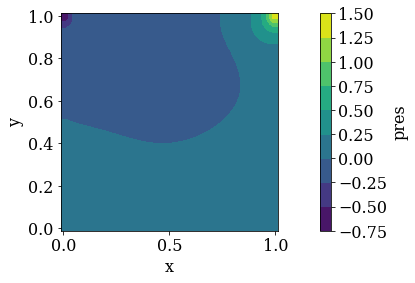

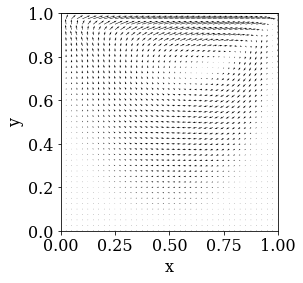

In [4]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_vector(gridx,gridy,'velc')

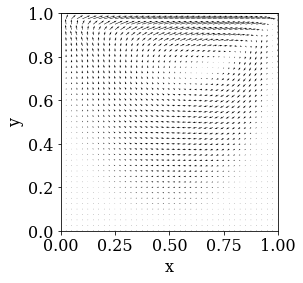

<Figure size 432x288 with 0 Axes>

In [85]:
gridx.get_l2_norm('eror')
flowx.io.plot_vector(gridx,gridy,'velc')
pyplot.savefig('vector.png')

"\npyplot.plot( X[20,:], gridy.get_values('velc')[20,:])\npyplot.plot( X[20,:], gridy.get_values('velc')[25,:])\npyplot.plot( X[20,:], gridy.get_values('velc')[30,:])\npyplot.plot( X[20,:], gridy.get_values('velc')[39,:])\n"

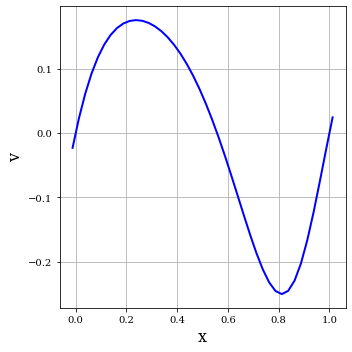

In [83]:
from matplotlib import pyplot
%matplotlib inline
X, Y = numpy.meshgrid(gridx.x, gridy.y)

pyplot.figure(figsize=(5, 5))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('v', fontsize=16)
pyplot.plot( gridy.x, gridy.get_values('velc')[:,20 ], color='b', linestyle='-', linewidth=2)
pyplot.tight_layout()
pyplot.savefig('v.png')
'''
pyplot.plot( X[20,:], gridy.get_values('velc')[20,:])
pyplot.plot( X[20,:], gridy.get_values('velc')[25,:])
pyplot.plot( X[20,:], gridy.get_values('velc')[30,:])
pyplot.plot( X[20,:], gridy.get_values('velc')[39,:])
'''

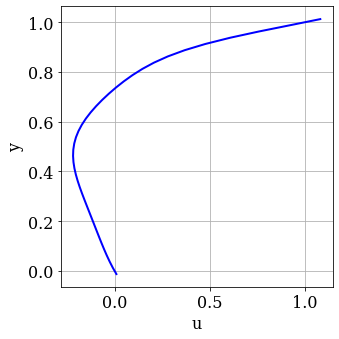

In [89]:
pyplot.figure(figsize=(5, 5))
pyplot.grid()
pyplot.xlabel('u', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(gridx.get_values('velc')[21,: ], gridx.y, color='b', linestyle='-', linewidth=2)
pyplot.tight_layout()
pyplot.savefig('u.png')

In [ ]:
X[:,:]
numpy.shape(X)

In [61]:
gridy.x

array([-0.0125,  0.0125,  0.0375,  0.0625,  0.0875,  0.1125,  0.1375,
        0.1625,  0.1875,  0.2125,  0.2375,  0.2625,  0.2875,  0.3125,
        0.3375,  0.3625,  0.3875,  0.4125,  0.4375,  0.4625,  0.4875,
        0.5125,  0.5375,  0.5625,  0.5875,  0.6125,  0.6375,  0.6625,
        0.6875,  0.7125,  0.7375,  0.7625,  0.7875,  0.8125,  0.8375,
        0.8625,  0.8875,  0.9125,  0.9375,  0.9625,  0.9875,  1.0125])

In [74]:
gridx.get_values('velc')[:,20]

array([ 0.        , -0.00178122, -0.00647336, -0.01348736, -0.02230215,
       -0.03246882, -0.04361164, -0.05542517, -0.06766816, -0.0801552 ,
       -0.09274714, -0.10534105, -0.11786064, -0.13024709, -0.14245072,
       -0.15442331, -0.1661109 , -0.17744702, -0.18834604, -0.19869662,
       -0.20835516, -0.2171394 , -0.22482231, -0.23112722, -0.2357251 ,
       -0.23823589, -0.23823666, -0.23527968, -0.22892461, -0.21878824,
       -0.20461379, -0.18635741, -0.16428323, -0.13904842, -0.11175129,
       -0.08391148, -0.05736045, -0.03404646, -0.01579566, -0.00409983,
        0.        ])

In [80]:
numpy.shape(gridx.get_values('velc'))


(41, 42)

ValueError: The rows of 'x' must be equal

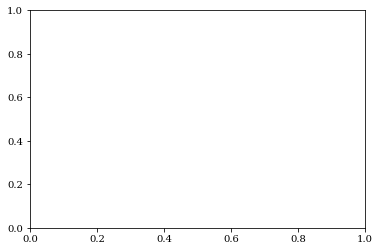

In [82]:
pyplot.streamplot(Y, X, gridx.get_values('velc')[:,:-1], gridy.get_values('velc')[:-1,:], density=2, linewidth=1, arrowsize=2, arrowstyle='->')